# SPRINT 1.  MARKETING

### ¿Como afecta la duración de las llamadas de contacto con la probabilidad que un cliente se suscriba a un depósito a plazo, y que ajustes podríams hacer a nuestros métodos de contacto para mejorar la tasa de respuesta?


## 1. IMPORTACIÓN BBDD I CREACIÓN DEL DF

In [142]:
from sqlalchemy import create_engine, inspect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, time, datetime
from math import trunc

#Dades de connexió

usuario='EquipoB'

contraseña="E1q2u3i4p5oB"
host='212.227.90.6'
puerto=3306
nombre_base_datos='EquipB'

#Crear la URL de la connexió
url_conexion=f"mysql+pymysql://{usuario}:{contraseña}@{host}:{puerto}/{nombre_base_datos}"

try:
    #Crear el engine de SQLAlchemy
    engine=create_engine(url_conexion)
    cnx=engine.connect()

    print("conexió correcta")
    #cnx.close()
except Exception as e:
    print(f"Error al conectar con SQLAlchemy: {e}")
    
#Recordar que inspect del codi anterior quan creo la connexió amb sqlalchemy
#from sqlalchemy import create_engine, inspect
inspector=inspect(engine)
nombre_tablas=inspector.get_table_names()

#Inclusión de la vista_finances en el su DF
if 'vista_marketing' not in nombre_tablas:
    nombre_tablas.append('vista_marketing')

# Diccionario para almacenar los DataFrames
df= {}

for taula in nombre_tablas:
    query=f"select * from {taula}"
    
    try:
        df[taula] = pd.read_sql(query, cnx)
        print(f"Taula '{taula}' carregada correctament.")
    except Exception as e:
        print(f"Error al carregar la taula '{taula}':{e}")
  
# Tancar la connexió
cnx.close()

conexió correcta
Taula 'BANK_marketing' carregada correctament.
Taula 'BANK_marketing131024' carregada correctament.
Taula 'vista_marketing' carregada correctament.


Creamos, a partir de una vista creada en SQL, el Data Frame Finanzas con el que trabajaremos a partir de ahora.

In [143]:
df_bank_clean = df['BANK_marketing']
df_marketing=df['vista_marketing']
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        11162 non-null  int64 
 1   contact   11162 non-null  object
 2   day       11162 non-null  int64 
 3   month     11162 non-null  object
 4   duration  11162 non-null  int64 
 5   campaign  11162 non-null  int64 
 6   pdays     11162 non-null  int64 
 7   previous  11162 non-null  int64 
 8   poutcome  11162 non-null  object
 9   deposit   11162 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 872.2+ KB


In [144]:
nombre_base_datos='original_schema'

#Crear la URL de la connexió
url_conexion=f"mysql+pymysql://{usuario}:{contraseña}@{host}:{puerto}/{nombre_base_datos}"

try:
    #Crear el engine de SQLAlchemy
    engine=create_engine(url_conexion)
    cnx=engine.connect()

    print("conexió correcta")
    #cnx.close()
except Exception as e:
    print(f"Error al conectar con SQLAlchemy: {e}")
    
#Recordar que inspect del codi anterior quan creo la connexió amb sqlalchemy
#from sqlalchemy import create_engine, inspect
inspector=inspect(engine)
nombre_tablas=inspector.get_table_names()

# Diccionario para almacenar los DataFrames
df= {}

for taula in nombre_tablas:
    query=f"select * from {taula}"
    
    try:
        df[taula] = pd.read_sql(query, cnx)
        print(f"Taula '{taula}' carregada correctament.")
    except Exception as e:
        print(f"Error al carregar la taula '{taula}':{e}")
  
# Tancar la connexió
cnx.close()

conexió correcta
Taula 'BANK_marketing' carregada correctament.
Taula 'BANK_marketing131024' carregada correctament.


In [145]:
df_bank_original = df['BANK_marketing']
df_bank_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11163 entries, 0 to 11162
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         11163 non-null  int64  
 1   age        11153 non-null  float64
 2   job        11163 non-null  object 
 3   marital    11158 non-null  object 
 4   education  11156 non-null  object 
 5   default    11163 non-null  object 
 6   balance    11163 non-null  int64  
 7   housing    11163 non-null  object 
 8   loan       11163 non-null  object 
 9   contact    11163 non-null  object 
 10  day        11163 non-null  int64  
 11  month      11163 non-null  object 
 12  duration   11163 non-null  int64  
 13  campaign   11163 non-null  int64  
 14  pdays      11163 non-null  int64  
 15  previous   11163 non-null  int64  
 16  poutcome   11163 non-null  object 
 17  deposit    11163 non-null  object 
dtypes: float64(1), int64(7), object(10)
memory usage: 1.5+ MB


## 1.1 Parametros globales de visualización matplotlib seaborn


In [146]:
# Configuración de parámetros globales para Matplotlib
plt.rcParams.update({
    'font.size': 12,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'legend.fontsize': 10,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'xtick.major.size': 5,
    'ytick.major.size': 5,
    'xtick.direction': 'out',
    'ytick.direction': 'out',
    'figure.figsize': (12, 6),
    'figure.dpi': 100,
    'legend.loc': 'upper right'
})

# Configuración de estilo y contexto de Seaborn
#sns.set(style="whitegrid")  # Estilo del gráfico
sns.set_context("notebook", font_scale=1.2, rc={
    "axes.labelsize": 12,
    "axes.titlesize": 14,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "legend.fontsize": 10,
    "legend.title_fontsize": 12 
})



## 2. EDA: ANÁLISIS EXPLORATÓRIO

Primero vamos a verificar que en el proceso de Data_cleaning, se mantiene los estadísticos centrales y dispersión de las columnas de la vista

## 2.1 Verificación estadísticos dataset con cleaning frente original

In [147]:
df_bank_original["deposit"]=df_bank_original["deposit"].replace({'yes':1,'no':0})
columns=["id","day","duration","campaign","pdays","previous","deposit"]
df_bank_original[columns].describe()

C:\Users\gorka\AppData\Local\Temp\ipykernel_25384\4210430308.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_bank_original["deposit"]=df_bank_original["deposit"].replace({'yes':1,'no':0})


,id,day,duration,campaign,pdays,previous,deposit
count,11163.000000,11163.000000,11163.000000,11163.000000,11163.000000,11163.000000,11163.000000
mean,5582.000000,15.657081,372.053839,2.508286,51.325719,0.832482,0.473887
std,3222.624862,8.420967,347.170757,2.721993,108.754538,2.291918,0.499340
min,1.000000,1.000000,2.000000,1.000000,-1.000000,0.000000,0.000000
25%,2791.500000,8.000000,138.000000,1.000000,-1.000000,0.000000,0.000000
50%,5582.000000,15.000000,255.000000,2.000000,-1.000000,0.000000,0.000000
75%,8372.500000,22.000000,496.000000,3.000000,20.500000,1.000000,1.000000
max,11163.000000,31.000000,3881.000000,63.000000,854.000000,58.000000,1.000000


In [148]:
df_marketing.describe()

,id,day,duration,campaign,pdays,previous,deposit
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,5582.499910,15.658036,371.993818,2.508421,51.330407,0.832557,0.473840
std,3222.336342,8.420740,347.128386,2.722077,108.758282,2.292007,0.499338
min,1.000000,1.000000,2.000000,1.000000,-1.000000,0.000000,0.000000
25%,2792.250000,8.000000,138.000000,1.000000,-1.000000,0.000000,0.000000
50%,5582.500000,15.000000,255.000000,2.000000,-1.000000,0.000000,0.000000
75%,8372.750000,22.000000,496.000000,3.000000,20.750000,1.000000,1.000000
max,11163.000000,31.000000,3881.000000,63.000000,854.000000,58.000000,1.000000


Queda verificado que los estadísticos de centralitat y de dispersión se mantienen.

In [149]:
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        11162 non-null  int64 
 1   contact   11162 non-null  object
 2   day       11162 non-null  int64 
 3   month     11162 non-null  object
 4   duration  11162 non-null  int64 
 5   campaign  11162 non-null  int64 
 6   pdays     11162 non-null  int64 
 7   previous  11162 non-null  int64 
 8   poutcome  11162 non-null  object
 9   deposit   11162 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 872.2+ KB


In [150]:
df_marketing.head()

,id,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1,unknown,5,may,1042,1,-1,0,unknown,1
1,3,unknown,5,may,1467,1,-1,0,unknown,1
2,4,unknown,5,may,1389,1,-1,0,unknown,1
3,5,unknown,5,may,579,1,-1,0,unknown,1
4,6,unknown,5,may,673,2,-1,0,unknown,1


# 2.2 Creación nueva columna "duration_min"

Antes de proceder a las visualizaciones, creamos una nueva columna en df_marketing que tenga la categorización de la duración por cuartiles y outliers leves y outliers extremos

In [151]:
#df_marketing["duration_min"]=round(df_marketing["duration"]/60,1).astype(int)
df_marketing["duration_min"]=round(df_marketing["duration"]/60,1)
df_marketing["duration_min"]

0        17.4
1        24.4
2        23.2
3         9.6
4        11.2
         ... 
11157     4.3
11158     1.4
11159     2.6
11160     0.2
11161    10.5
Name: duration_min, Length: 11162, dtype: float64

In [152]:
def cuartiles(df):
    #calcular cuartiles
    Q1 = df.quantile(0.25)
    Q2 = df.quantile(0.50)
    Q3 = df.quantile(0.75)

    #calcular IQR (rango intercuartílico)
    IQR = Q3 - Q1

    #calcular límite outliers
    min_Q = Q1 - 1.5*IQR
    max_Q = Q3 + 1.5*IQR

    min_Q_ext=Q1 - 3*IQR
    max_Q_ext=Q3 + 3*IQR
    
    return Q1, Q2, Q3, min_Q, max_Q, min_Q_ext,max_Q_ext

Q1, Q2, Q3, min_Q, max_Q, min_Q_ext,max_Q_ext = cuartiles(df_marketing['duration_min'])

def clasificacion_duration(valor):
    
    if  valor < min_Q_ext:
        return "extremo-muy-bajo"
    elif valor < min_Q:
        return "muy-bajo"
    elif valor < Q1:
        return "bajo"
    elif valor < Q2:
        return "medio-bajo"
    elif valor < Q3:
        return "medio-alto"
    elif valor < max_Q:
        return "alto"
    elif valor < max_Q_ext:
        return "muy-alto"
    else:
        return "extremo-muy-alto"
df_marketing["desc_duration"] = df_marketing["duration_min"].apply(clasificacion_duration)


## 2.1 VISUALIZACIONES

In [153]:
df_marketing["desc_duration"].value_counts() 

desc_duration
medio-alto          2930
medio-bajo          2732
bajo                2707
alto                2171
muy-alto             513
extremo-muy-alto     109
Name: count, dtype: int64

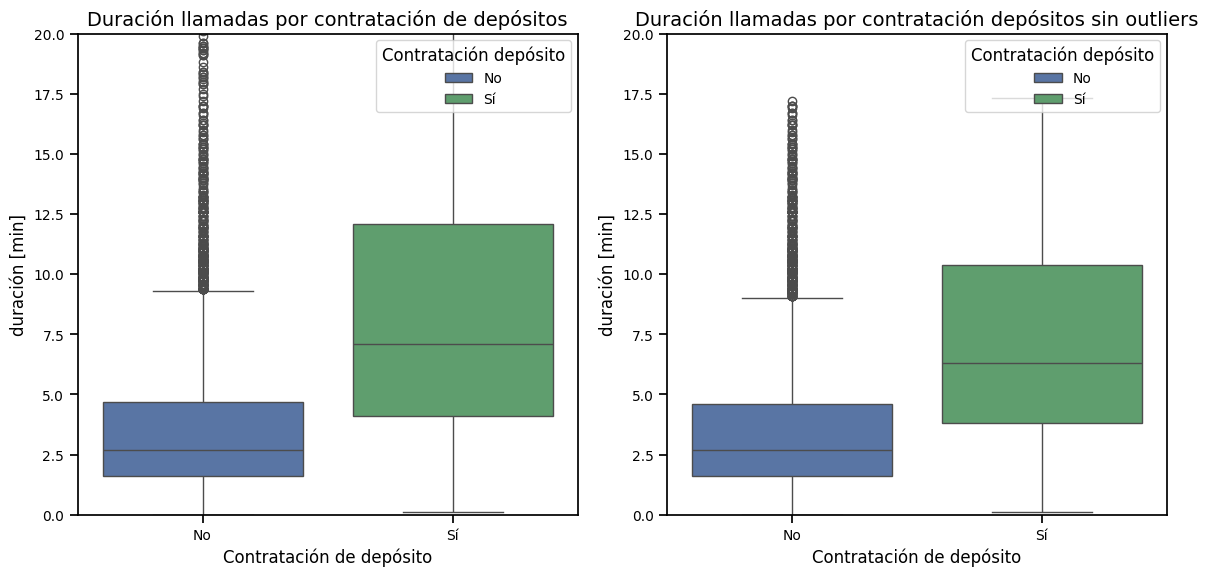

In [154]:
plt.style.use("seaborn-v0_8-deep")
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Crear un boxplot per veure la distribució de la durada segons si s'ha subscrit al dipòsit
#custom_palette = ['skyblue', 'salmon']
sns.boxplot(x='deposit', y='duration_min', data=df_marketing,ax=axs[0], hue="deposit")
axs[0].set_title('Duración llamadas por contratación de depósitos')

#set_xticks para fixar el eje x cn solo dos ticks y así evitar el warning cuando renombre los set_xticklabels
axs[0].set_xticks([0, 1])
axs[0].set_ylim(0, 20)
axs[0].set_xticklabels(['No', 'Sí'])
axs[0].set_xlabel('Contratación de depósito')
axs[0].set_ylabel('duración [min]')
axs[0].legend(title="Contratación depósito", labels=["No", "Sí"])


filtro_sin_anomalos=((df_marketing['desc_duration']!="muy-alto") & (df_marketing['desc_duration']!="extremo-muy-alto"))
# Crear un boxplot per veure la distribució de la durada segons si s'ha subscrit al dipòsit
#custom_palette = ['skyblue', 'salmon']
sns.boxplot(x='deposit', y='duration_min', data=df_marketing[filtro_sin_anomalos],ax=axs[1],hue="deposit")
axs[1].set_title('Duración llamadas por contratación depósitos sin outliers')
#set_xticks para fixar el eje x cn solo dos ticks y así evitar el warning cuando renombre los set_xticklabels
axs[1].set_xticks([0, 1])
axs[1].set_ylim(0, 20)
axs[1].set_xticklabels(['No', 'Sí'])
axs[1].set_xlabel('Contratación de depósito')
axs[1].set_ylabel('duración [min]')
axs[1].legend(title="Contratación depósito", labels=["No", "Sí"])



# Para evitar solapamiento entre los gráficos
plt.tight_layout()  
# Mostrar los dos gráficos juntos
plt.show()




Tanto si quitamos los valores atípicos leves y extremos, como si no, **parece ser que es más probable contratar un depósito cuando el tiempo de duración es mayor**

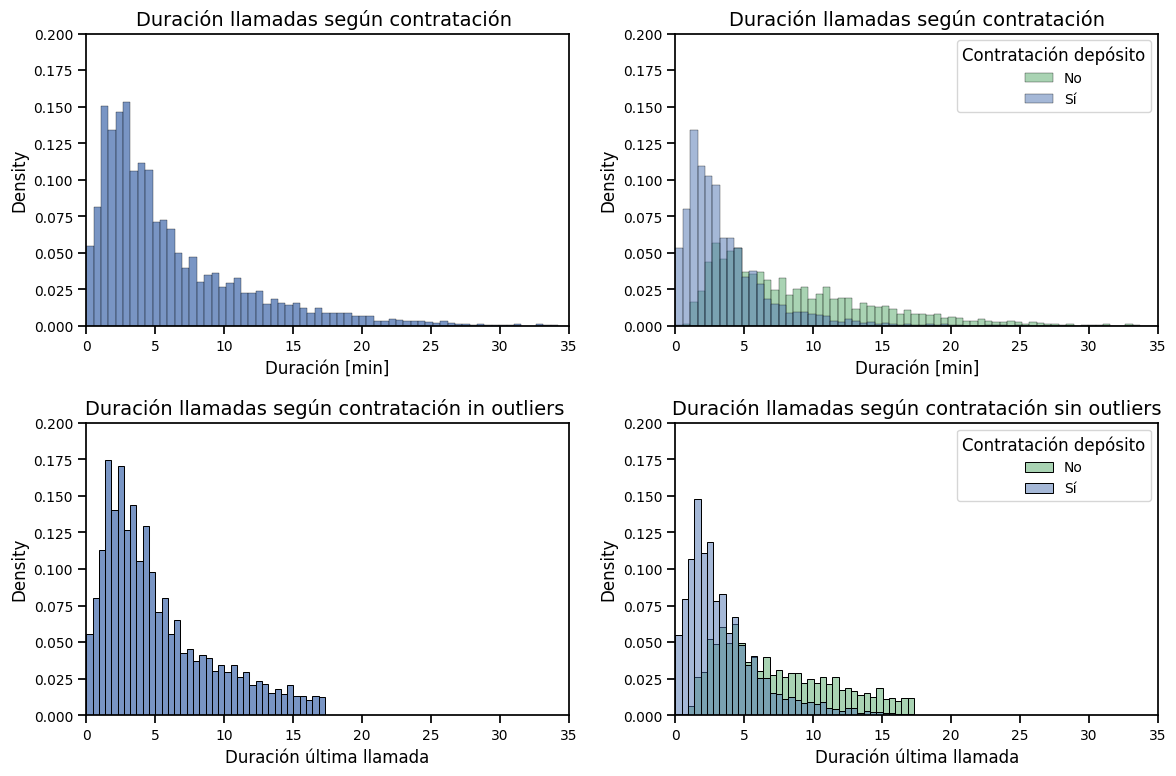

In [155]:
#Ahora a generar una matriz de 2x2 subplots, se accede a cada uno por axs[i,j]
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

#Utilizar displot no permite utilizar subplot. Bueno recordarlo.
#sns.displot(data=df_marketing,x="duration", kde=False, ax=axs[0], stat='density')
# Graficamos el histograma con seaborn displot
sns.histplot(data=df_marketing, x="duration_min", kde=False, ax=axs[0,0], stat='density')
axs[0,0].set_title('Duración llamadas según contratación ')
axs[0,0].set_xlabel('Duración [min]')
axs[0,0].set_xlim(0, 35)
axs[0,0].set_ylim(0, 0.2)

sns.histplot(data=df_marketing, x="duration_min", kde=False, ax=axs[0,1], hue='deposit',stat='density')
axs[0,1].set_title('Duración llamadas según contratación')
axs[0,1].set_xlim(0, 35)
axs[0,1].set_ylim(0, 0.2)

axs[0,1].set_xlabel('Duración [min]')
axs[0,1].legend(title="Contratación depósito", labels=["No", "Sí"])


sns.histplot(data=df_marketing[filtro_sin_anomalos], x="duration_min", kde=False, ax=axs[1,0], stat='density')
axs[1,0].set_title('Duración llamadas según contratación in outliers ')
axs[1,0].set_xlabel('Duración última llamada')
axs[1,0].set_xlim(0, 35)
axs[1,0].set_ylim(0, 0.2)


sns.histplot(data=df_marketing[filtro_sin_anomalos], x="duration_min", kde=False, ax=axs[1,1], hue='deposit',stat='density')
axs[1,1].set_title('Duración llamadas según contratación sin outliers')
axs[1,1].set_xlabel('Duración última llamada')
axs[1,1].set_xlim(0, 35)
axs[1,1].set_ylim(0, 0.2)
axs[1,1].legend(title="Contratación depósito", labels=["No", "Sí"])

plt.tight_layout()  
plt.show()

## 3. ANÁLISIS MEDIANTE LA TASA DE CONVERSIÓN DE CONTRATACIÓN DE DEPÓSITOS


En un principio queríamos segmentar, la duración en segmentos más pequeños, pero al final se optó por segmentar la duración por los cuartiles principales, Q1, Q2, etc por acuerdo con el equipo.
Eso sí, igualmente para no perder la definición de creación de intervalos nos creamos otra variable aparte de nombre "rango_duración", donde tendremos los rangos en duración en minutos, para que sea más explicativo para los gráficos.


In [156]:
positive_infinity = float('inf')
df_marketing['rango_duracion_real'] = pd.cut(df_marketing['duration_min'], bins=[0, Q1, Q2, Q3, max_Q, max_Q_ext, positive_infinity])

int_Q1=round(Q1,0).astype('int64')
int_Q2=round(Q2,0).astype('int64')
int_Q3=round(Q3,0).astype('int64')
int_max_Q=round(max_Q,0).astype('int64')
int_max_Q_ext=round(max_Q_ext,0).astype('int64')
df_marketing['rango_duracion_grafico'] = pd.cut(df_marketing['duration_min'], bins=[0, int_Q1, int_Q2, int_Q3, int_max_Q, int_max_Q_ext, positive_infinity])


In [157]:
df_marketing.head()

,id,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,duration_min,desc_duration,rango_duracion_real,rango_duracion_grafico
0,1,unknown,5,may,1042,1,-1,0,unknown,1,17.4,muy-alto,"(17.3, 26.3]","(17.0, 26.0]"
1,3,unknown,5,may,1467,1,-1,0,unknown,1,24.4,muy-alto,"(17.3, 26.3]","(17.0, 26.0]"
2,4,unknown,5,may,1389,1,-1,0,unknown,1,23.2,muy-alto,"(17.3, 26.3]","(17.0, 26.0]"
3,5,unknown,5,may,579,1,-1,0,unknown,1,9.6,alto,"(8.3, 17.3]","(8.0, 17.0]"
4,6,unknown,5,may,673,2,-1,0,unknown,1,11.2,alto,"(8.3, 17.3]","(8.0, 17.0]"


Agruparemos las etiquetas de des_duracion y sumar los 1 de cada rango de los depósitos y los registros por depósito

In [158]:
agrup_duration_bins=df_marketing.groupby('rango_duracion_real')
serie_1=agrup_duration_bins['duration_min'].mean()
serie_2=agrup_duration_bins['deposit'].sum()
serie_3=agrup_duration_bins['deposit'].count()

df_tasa_conversion = pd.concat([serie_1, serie_2, serie_3], axis = 1)
df_tasa_conversion.columns=["avg_duration","num_deposit_contratados","num_total_registros"]
df_tasa_conversion.reset_index(drop=False, inplace=True)
df_tasa_conversion

C:\Users\gorka\AppData\Local\Temp\ipykernel_25384\3318292898.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agrup_duration_bins=df_marketing.groupby('rango_duracion_real')


,rango_duracion_real,avg_duration,num_deposit_contratados,num_total_registros
0,"(0.0, 2.3]",1.415972,352,2855
1,"(2.3, 4.2]",3.246143,1085,2735
2,"(4.2, 8.3]",5.917261,1575,2804
3,"(8.3, 17.3]",11.865205,1719,2144
4,"(17.3, 26.3]",20.753411,456,513
5,"(26.3, inf]",33.073394,102,109


In [159]:
df_tasa_conversion["categoria_rango_duracion"] = df_tasa_conversion["avg_duration"].apply(clasificacion_duration)
df_tasa_conversion

,rango_duracion_real,avg_duration,num_deposit_contratados,num_total_registros,categoria_rango_duracion
0,"(0.0, 2.3]",1.415972,352,2855,bajo
1,"(2.3, 4.2]",3.246143,1085,2735,medio-bajo
2,"(4.2, 8.3]",5.917261,1575,2804,medio-alto
3,"(8.3, 17.3]",11.865205,1719,2144,alto
4,"(17.3, 26.3]",20.753411,456,513,muy-alto
5,"(26.3, inf]",33.073394,102,109,extremo-muy-alto


In [160]:
# Crear una nueva columna 'Etiqueta' que concatena 'Intervalo' y 'Descripcion'
df_tasa_conversion['categoria_duracion'] = df_tasa_conversion.apply(lambda row: f"{row['rango_duracion_real']} - {row['categoria_rango_duracion']}", axis=1)
df_tasa_conversion

,rango_duracion_real,avg_duration,num_deposit_contratados,num_total_registros,categoria_rango_duracion,categoria_duracion
0,"(0.0, 2.3]",1.415972,352,2855,bajo,"(0.0, 2.3] - bajo"
1,"(2.3, 4.2]",3.246143,1085,2735,medio-bajo,"(2.3, 4.2] - medio-bajo"
2,"(4.2, 8.3]",5.917261,1575,2804,medio-alto,"(4.2, 8.3] - medio-alto"
3,"(8.3, 17.3]",11.865205,1719,2144,alto,"(8.3, 17.3] - alto"
4,"(17.3, 26.3]",20.753411,456,513,muy-alto,"(17.3, 26.3] - muy-alto"
5,"(26.3, inf]",33.073394,102,109,extremo-muy-alto,"(26.3, inf] - extremo-muy-alto"


In [161]:
df_tasa_conversion['tasa_conversion']=df_tasa_conversion['num_deposit_contratados']/df_tasa_conversion['num_total_registros']
df_tasa_conversion

,rango_duracion_real,avg_duration,num_deposit_contratados,num_total_registros,categoria_rango_duracion,categoria_duracion,tasa_conversion
0,"(0.0, 2.3]",1.415972,352,2855,bajo,"(0.0, 2.3] - bajo",0.123292
1,"(2.3, 4.2]",3.246143,1085,2735,medio-bajo,"(2.3, 4.2] - medio-bajo",0.396709
2,"(4.2, 8.3]",5.917261,1575,2804,medio-alto,"(4.2, 8.3] - medio-alto",0.561698
3,"(8.3, 17.3]",11.865205,1719,2144,alto,"(8.3, 17.3] - alto",0.801772
4,"(17.3, 26.3]",20.753411,456,513,muy-alto,"(17.3, 26.3] - muy-alto",0.888889
5,"(26.3, inf]",33.073394,102,109,extremo-muy-alto,"(26.3, inf] - extremo-muy-alto",0.935780


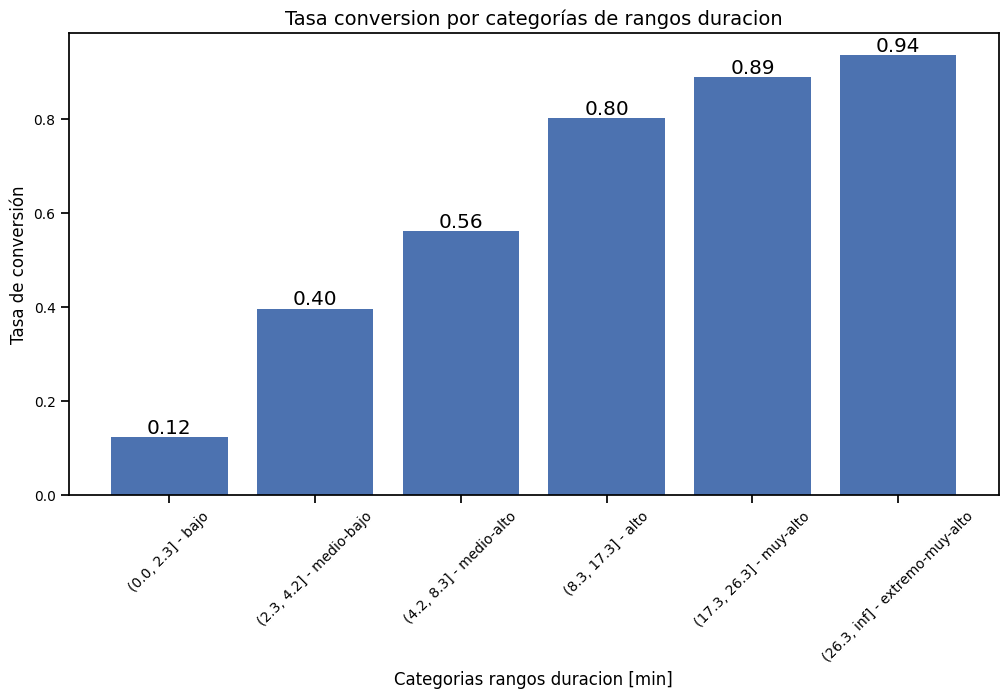

In [162]:

fig, ax = plt.subplots()
bars=ax.bar(df_tasa_conversion['categoria_duracion'], df_tasa_conversion['tasa_conversion'])
# Añadir títulos y etiquetas
plt.xticks(rotation=45)
plt.title("Tasa conversion por categorías de rangos duracion")
plt.xlabel("Categorias rangos duracion [min]")
plt.ylabel("Tasa de conversión")

# Añadir los valores encima de las barras
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}", ha='center', va='bottom')

# Mostrar gráfico
plt.show()

### 4. Estimación de la probabilidad de contratación según la duración